In [45]:
# Load required packages for Data analysis
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.tree import DecisionTreeClassifier  
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("bank-additional-full.csv",sep=';')
data.rename(columns={'emp.var.rate': 'emp_var_rate', 'cons.price.idx':'cons_price_idx','cons.conf.idx' : 'cons_conf_idx','nr.employed' : 'nr_employed', 'y' : 'Subscription'}, inplace=True)
print("Number of columns: {}".format(len(data.columns)))

Number of columns: 21


In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


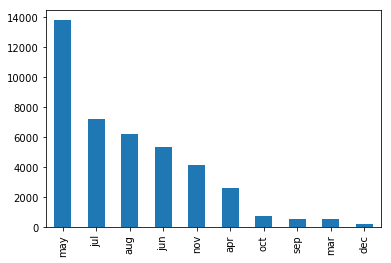

In [6]:
data.month.value_counts().plot(kind='bar')
# Most of the campaign was done in May, July, August

In [7]:
pd.crosstab(data.month,data.Subscription)

Subscription,no,yes
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB0F1B0668>]], dtype=object)

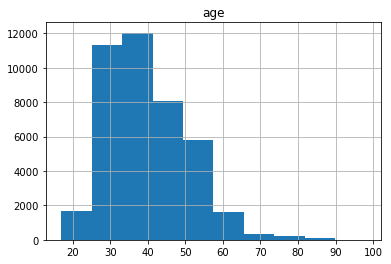

In [8]:
data.hist(column='age')

In [9]:
import numpy as np
bins = [17,21,32,50,98]
group = ['Student','Young','Middle','Old']
duration_categories = pd.cut(data['age'], bins, labels = group)
data['age_categories'] = pd.cut(data['age'], bins, labels=group)
data.age_categories.value_counts()
pd.crosstab(data.age_categories,data.Subscription)

#Students are more likely to subscribe

Subscription,no,yes
age_categories,,
Student,153,84
Young,9492,1442
Middle,20802,2030
Old,6098,1082


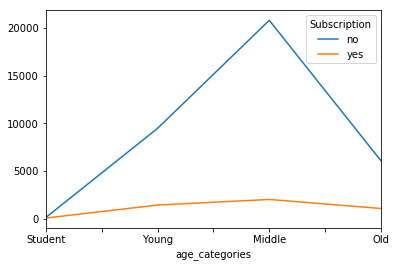

In [10]:
pd.crosstab(data.age_categories,data.Subscription).plot()

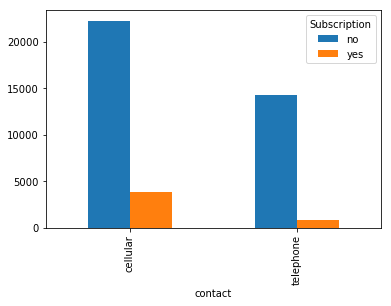

In [11]:
pd.crosstab(data.contact,data.Subscription).plot(kind='bar')

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


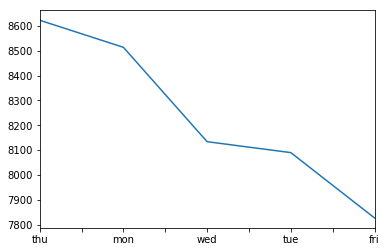

In [12]:
print(data.day_of_week.value_counts())
data.day_of_week.value_counts().plot()
# Fridays its less (weekend)

Subscription    no   yes
day_of_week             
fri           6981   846
mon           7667   847
thu           7578  1045
tue           7137   953
wed           7185   949


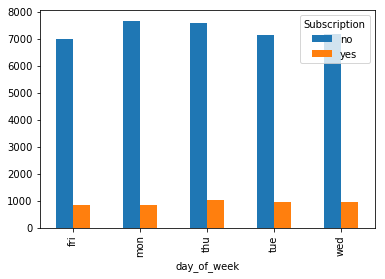

In [13]:
pd.crosstab(data.day_of_week,data.Subscription).plot(kind='bar')
print(pd.crosstab(data.day_of_week,data.Subscription))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB0FDDDE10>]], dtype=object)

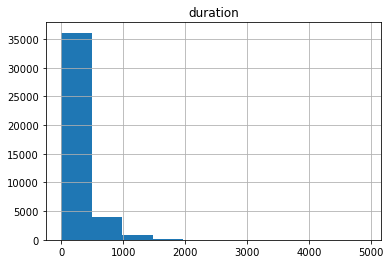

In [14]:
data.hist(column='duration')

Subscription            no   yes
duration_categories             
Low                  10222    87
Okay                  9915   477
Good                  9120  1077
Great                 7287  2999


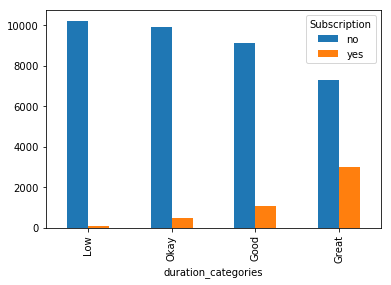

In [15]:
import numpy as np
bins = [0,102,180,319,4918]
group_names = ['Low','Okay','Good','Great']
duration_categories = pd.cut(data['duration'], bins, labels=group_names)
data['duration_categories'] = pd.cut(data['duration'], bins, labels=group_names)
data.duration_categories.value_counts()
pd.crosstab(data.duration_categories,data.Subscription).plot(kind='bar')
print(pd.crosstab(data.duration_categories,data.Subscription))
#Customers whose call duration was great are more likely to subscribe 

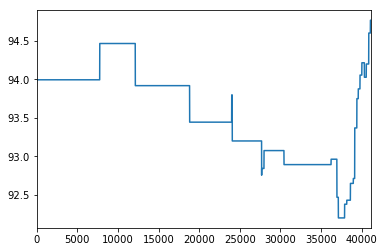

In [16]:
data.cons_price_idx.plot()
# Consumer price index is high with majority of the customers

In [17]:
import numpy as np
bins = [0.634,1.344,2.857,3.96100,5.045000]
group_name = ['Low','Okay','Good','High']
duration_categories = pd.cut(data['euribor3m'], bins, labels = group_name)
data['euribor3m_categories'] = pd.cut(data['euribor3m'], bins, labels=group_name)
data.euribor3m_categories.value_counts()
pd.crosstab(data.euribor3m_categories,data.Subscription)
#Customers whose (euribor) 3 months rate is low, there are more likely chances of subscribing

Subscription,no,yes
euribor3m_categories,,
Low,7865,2670
Okay,2330,625
Good,13,1
High,26338,1338


In [18]:
data.nr_employed.value_counts()
#This gives us no.of employees quaterly employed 

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr_employed, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB0E3836A0>]], dtype=object)

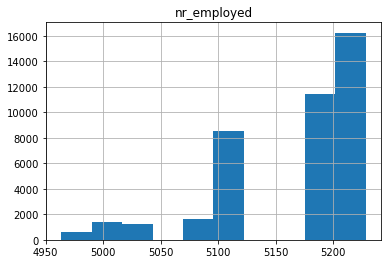

In [19]:
data.hist(column='nr_employed')

In [20]:
pd.crosstab(data.nr_employed,data.Subscription)
#number of employees - quarterly indicator 
#There are more likely chances of subscribing if quaterly indicator is 5200

Subscription,no,yes
nr_employed,,
4963.6,334,301
4991.6,370,403
5008.7,281,369
5017.5,617,454
5023.5,84,88
5076.2,1069,594
5099.1,7442,1092
5176.3,9,1
5191.0,7523,240


In [25]:
data.columns
for i in data.columns:
    if data[i].dtype == 'object':
        le.fit(data[i])
        data[i] = le.transform(data[i])

In [27]:
# max_depth can be controlled for pruning
model = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=20, max_depth=9)
model = model.fit(X_train,y_train)
print(model)
Y_test = model.predict(X_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [28]:
from sklearn import metrics
# Confusion Matrix
print(metrics.confusion_matrix(y_test, Y_test))
print(metrics.classification_report(y_test, Y_test))
print(metrics.accuracy_score(y_test, Y_test))

[[7049  270]
 [ 413  506]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      7319
          1       0.65      0.55      0.60       919

avg / total       0.91      0.92      0.91      8238

0.91709152707


In [29]:
print(pd.DataFrame(model.feature_importances_,columns = ['Importance'],index = X_train.columns))
#Duration of the call and no.of customers quaterly employeed are two most significant variables for our model prediction

                Importance
age               0.021760
education         0.007357
default           0.001909
housing           0.001903
loan              0.000763
contact           0.002267
month             0.022190
day_of_week       0.015051
duration          0.472024
campaign          0.008999
pdays             0.024955
poutcome          0.004042
cons_price_idx    0.016140
cons_conf_idx     0.078168
euribor3m         0.058597
nr_employed       0.263875


In [30]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, Y_test, multioutput='uniform_average')
print("Mean Absolute Error: {}".format(mae))

mse = mean_squared_error(y_test, Y_test, multioutput='uniform_average')
print("Mean Squared Error: {}".format(mse))

r2 = r2_score(y_test, Y_test)
print("R - Squared value: {}".format(r2))


Mean Absolute Error: 0.0829084729303229
Mean Squared Error: 0.0829084729303229
R - Squared value: 0.163482111118066
